In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import datetime
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


In [12]:
## Logging of API requests

# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})
weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Iterate through Cities list and retrieve data
print("Start")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("End")


Start
-----------------------------
Processing Record 0  of Set 1 | faanui.
Processing Record 1  of Set 1 | dikson.
Processing Record 2  of Set 1 | chanika.
Processing Record 3  of Set 1 | ushuaia.
Processing Record 4  of Set 1 | hirara.
Processing Record 5  of Set 1 | norman wells.
Processing Record 6  of Set 1 | mahebourg.
Processing Record 7  of Set 1 | albany.
Processing Record 8  of Set 1 | cape town.
Processing Record 9  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 10  of Set 1 | saint-philippe.
Processing Record 11  of Set 1 | hermanus.
Processing Record 12  of Set 1 | paita.
Processing Record 13  of Set 1 | port elizabeth.
Processing Record 14  of Set 1 | bluff.
Processing Record 15  of Set 1 | new norfolk.
Processing Record 16  of Set 1 | hofn.
Processing Record 17  of Set 1 | mataura.
Processing Record 18  of Set 1 | vostok.
Processing Record 19  of Set 1 | qaanaaq.
Processing Record 20  of Set 1 | badarganj.
Processing Record 21  of Set 1 | ga

In [13]:
## Export data into a DF
weather_df.count()

City                601
Country             601
Date                601
Latitude            601
Longitude           601
Cloudiness (%)      601
Humidity (%)        601
Max Temp (F)        601
Wind Speed (mph)    601
dtype: int64

In [14]:
weather_df.head(10)

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,faanui,PF,2023-02-03 22:34:54,-16.4833,-151.75,14,74,82.166,7.71
1,dikson,RU,2023-02-03 22:35:46,73.5069,80.5464,100,100,-8.59,0.78
2,chanika,TZ,2023-02-03 22:35:46,-5.4167,38.0167,100,92,70.79,0.77
3,ushuaia,AR,2023-02-03 22:34:42,-54.8,-68.3,0,71,48.128,7.2
4,hirara,JP,2023-02-03 22:35:46,24.8,125.2833,75,73,68.54,5.14
5,norman wells,CA,2023-02-03 22:35:47,65.282,-126.8329,100,69,-23.494,2.06
6,mahebourg,MU,2023-02-03 22:35:47,-20.4081,57.7,40,83,82.526,3.09
7,albany,US,2023-02-03 22:30:01,42.6001,-73.9662,80,45,-6.376,2.68
8,cape town,ZA,2023-02-03 22:31:42,-33.9258,18.4232,0,75,68.648,2.06
9,taolanaro,,,,,,,,


In [17]:
# Changing d_types to float 
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df

#Adding a csv file of dataframe
weather_df.to_csv("weather_df.csv")
weather_df.head(2)

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,faanui,PF,2023-02-03 22:34:54,-16.4833,-151.75,14,74,82.166,7.71
1,dikson,RU,2023-02-03 22:35:46,73.5069,80.5464,100,100,-8.59,0.78


Temperature tends to increase as proximity to the equator increases


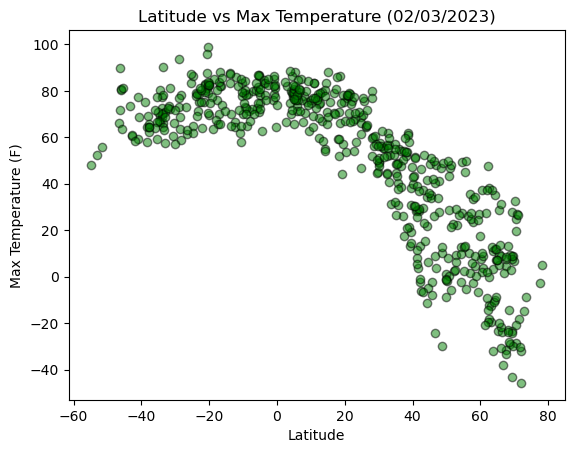

In [19]:
## Plot figures

# Lat v Temp

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs Max Temperature ({today})")
print("Temperature tends to increase as proximity to the equator increases")

# Save the figure
plt.savefig("output_data/LatvTemp.png")

# Show plot
plt.show()

No evident correlation between latitude and humidity


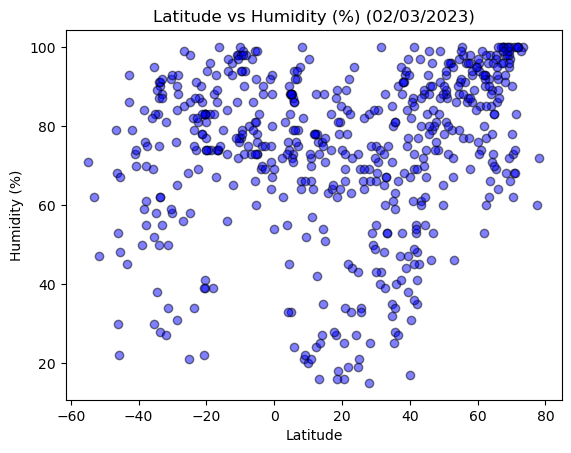

In [20]:
# Lat v Hum

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity (%) ({today})")
print("No evident correlation between latitude and humidity")

# Save the figure
plt.savefig("output_data/LatvHum.png")

# Show plot
plt.show()

No evident correlation between latitude and humidity


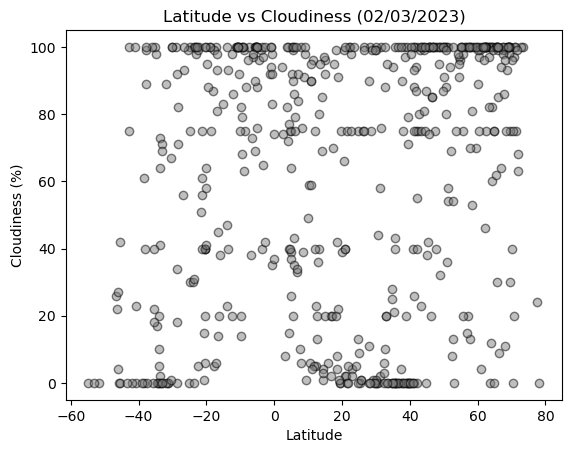

In [22]:
# Lat v Cloud

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="grey", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness ({today})")
print("No evident correlation between latitude and humidity")

# Save the figure
plt.savefig("output_data/LatvCloud.png")

# Show plot
plt.show()

No evident correlation between latitude and humidity


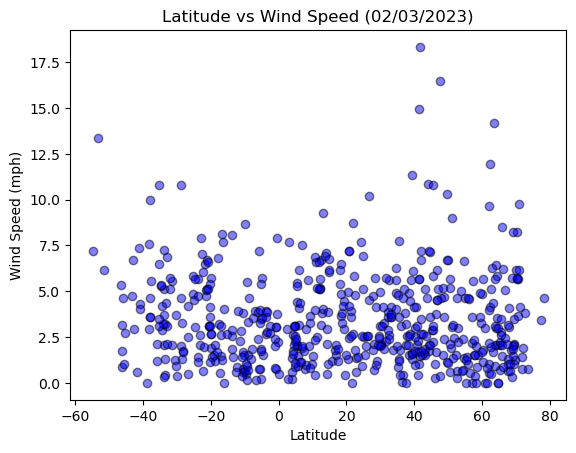

In [23]:
# Lat v Wind

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed ({today})")
print("No evident correlation between latitude and humidity")

# Save the figure
plt.savefig("output_data/LatvWind.png")

# Show plot
plt.show()

In [24]:
## Linear Regression Analysis

# Create df for north/south hemi. Using >=0 or <0, respectively

north_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) >= 0, :]
south_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

Regression line equation is: y = -1.39x + 91.22
The r-squared is: -0.8678889268044401
The regression displays a negative correlation. As you move into the northern hemi, temperature decreases


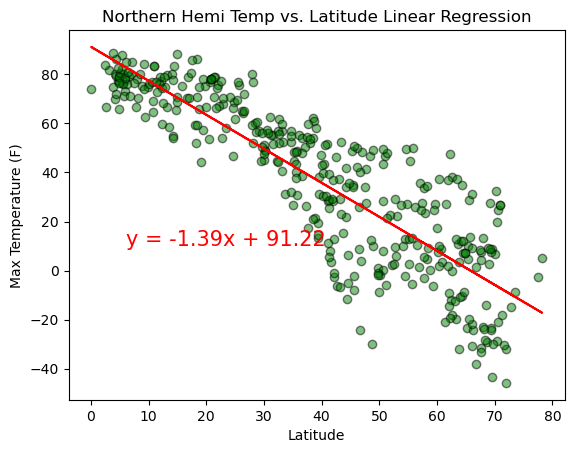

In [29]:
## Lat v Temp Linear Regressions

# North
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemi Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation. As you move into the northern hemi, temperature decreases")
plt.show()

Regression line equation is: y = 0.28x + 80.44
The r-squared is: 0.41273642545543276
The regression displays a positive correlation. As you move towards the equator, temperature increases.


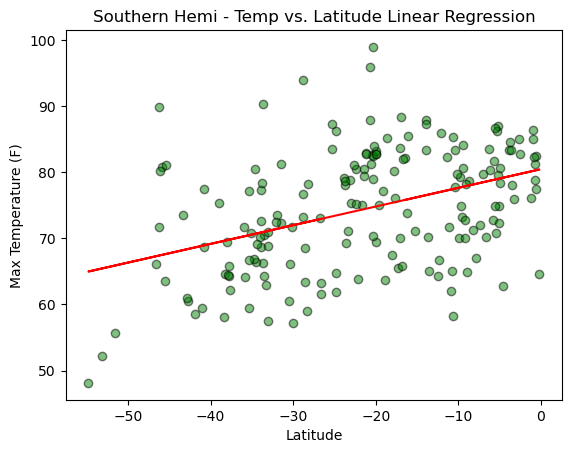

In [34]:
# South
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="green", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemi - Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation. As you move towards the equator, temperature increases.")
plt.show()

Regression line equation is: y = 0.42x + 56.83
The r-squared is: 0.40285168801760496
The regression does not display much of a correlation between the data sets.


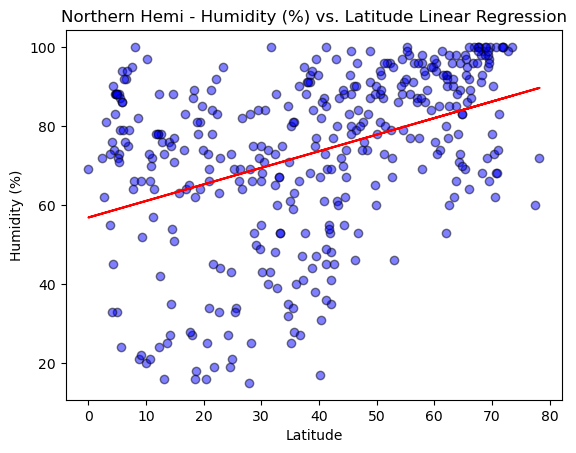

In [31]:
# Lat v Hum Linear Regressions

# North
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="blue", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemi - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The analysis does not display a correlation between the data.") 
plt.show()

Regression line equation is: y = 0.46x + 84.86
The r-squared is: 0.3390664851185658
The analysis does not display a correlation between the data.


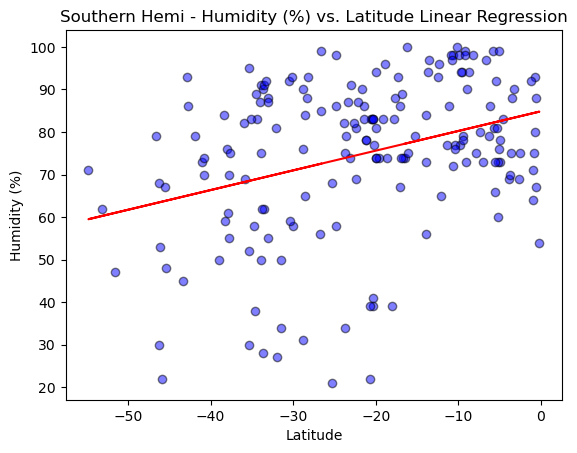

In [37]:
# South

x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="blue", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemi - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The analysis does not display a correlation between the data.")
plt.show()

Regression line equation is: y = 0.53x + 41.17
The r-squared is: 0.2787249190906767
The analysis does not display a correlation between the data.


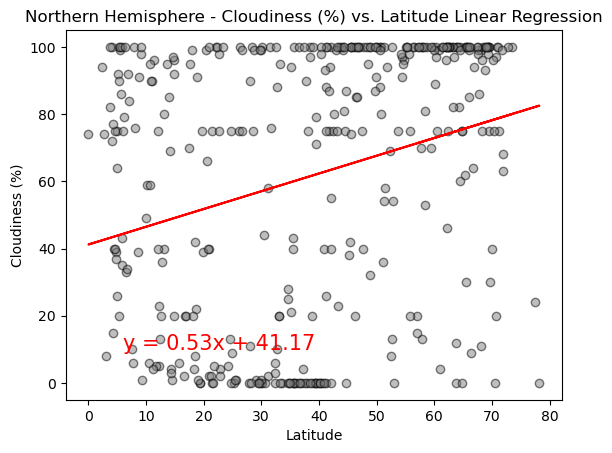

In [36]:
# Lat v Cloud

# North

x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="grey", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The analysis does not display a correlation between the data.")
plt.show()

Regression line equation is: y = 1.48x + 92.14
The r-squared is: 0.5089585204366742
The analysis does not display a correlation between the data.


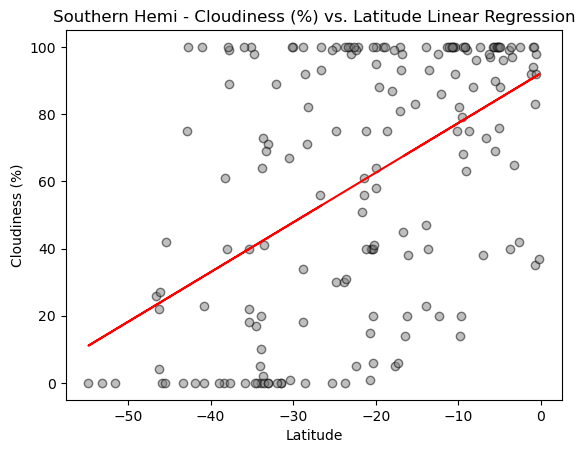

In [38]:
# South

x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="grey", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemi - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The analysis does not display a correlation between the data.")
plt.show()

Regression line equation is: y = 0.0x + 3.39
The r-squared is: 0.0011145678909633113
The regression does not display much of a correlation between the data sets.


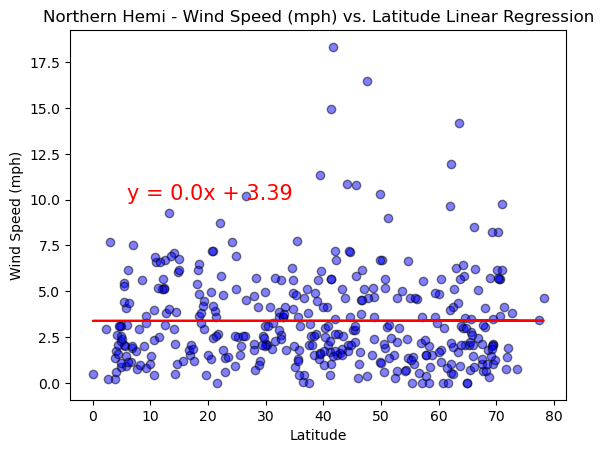

In [40]:
# Lat v Wind

# North

x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="blue", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemi - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The analysis does not display a correlation between the data.")
plt.show()

Regression line equation is: y = -0.05x + 2.41
The r-squared is: -0.26528776452729064
The analysis does not display a correlation between the data.


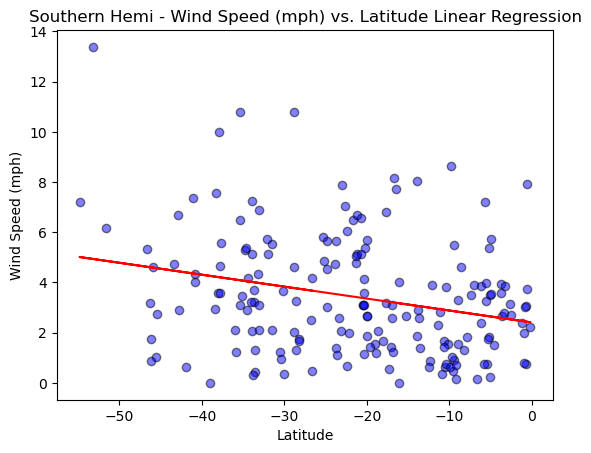

In [43]:
# South
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values, facecolors="blue", edgecolors="black", alpha = 0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemi - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The analysis does not display a correlation between the data.")
plt.show()